# 📍Gradient Descent
'모두를 위한 딥러닝2'의 'Lab03 Gradient Descent'을 듣고 정리한 코드입니다.
  
* 강의 링크: https://www.youtube.com/watch?v=sVUbNEM9Ap0&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=5
* 블로그 링크: https://gaga.tistory.com/205

In [2]:
import torch

In [3]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [7]:
# 모델 초기화
W = torch.zeros(1)
# Learning rate 설정
lr = 0.1

학습하면서 W는 1에 수렴하고 cost는 줄어든다

In [9]:
nb_epochs = 10

for epoch in range(nb_epochs + 1):
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)
    
    print("Epoch {:4d}/{} W: {:3f}, Cost: {:6f}".format(
        epoch, nb_epochs, W.item(), cost.item())) 
    
    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W: 0.000000, Cost: 4.666667
Epoch    1/10 W: 1.400000, Cost: 0.746666
Epoch    2/10 W: 0.840000, Cost: 0.119467
Epoch    3/10 W: 1.064000, Cost: 0.019115
Epoch    4/10 W: 0.974400, Cost: 0.003058
Epoch    5/10 W: 1.010240, Cost: 0.000489
Epoch    6/10 W: 0.995904, Cost: 0.000078
Epoch    7/10 W: 1.001638, Cost: 0.000013
Epoch    8/10 W: 0.999345, Cost: 0.000002
Epoch    9/10 W: 1.000262, Cost: 0.000000
Epoch   10/10 W: 0.999895, Cost: 0.000000


## What is the best model?
어떻게 모델의 좋고 나쁨을 평가할 수 있을까?

### Cost Function
모델의 예측 값이 실제 데이터와 얼마나 다른지 나타내는 함수  
잘 학습된 모델일 수록 낮은 Cost를 가진다

Linear Regression에서 사용된 cost function은 MSE (Mean Squared Error)  

In [10]:
cost = torch.mean((hypothesis - y_train) **2)

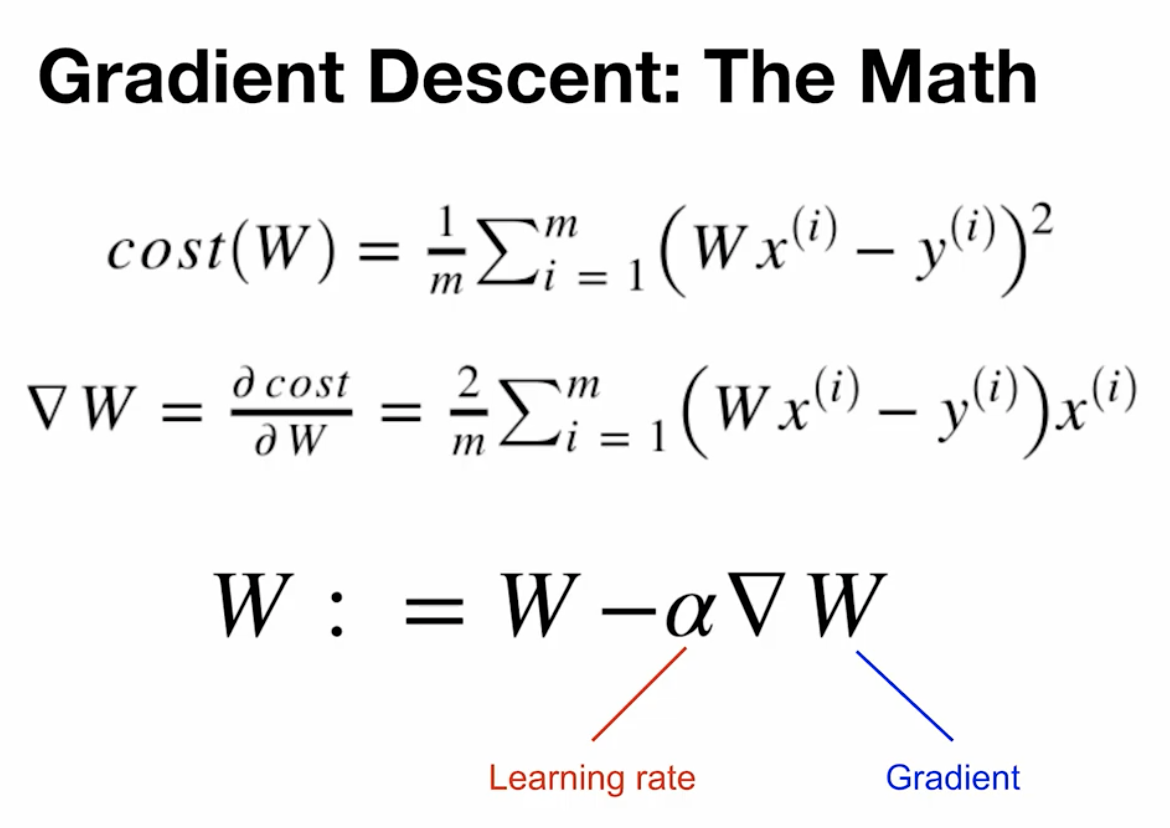

In [11]:
gradient = 2 * torch.mean((W * x_train - y_train) * x_train)
lr = 0.1
W -= lr * gradient

### Gradient Descent with torch.optim
* 시작할 때 Optimizer 정의
* optimizer.zero_grad(): gradient를 0으로 초기화  
(PyTorch는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있기 때문이다.)
* cost.backward(): 해당 수식의 W에 대한 gradient 계산
* optimizer.step(): gradient descent

In [14]:
# 모델 초기화
W = torch.zeros(1, requires_grad = True)
# optimizer 설정
optimizer = torch.optim.SGD([W], lr=0.15)


nb_epochs = 10

for epoch in range(nb_epochs + 1):
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    print("Epoch {:4d}/{} W: {:3f}, Cost: {:6f}".format(
        epoch, nb_epochs, W.item(), cost.item())) 
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000000, Cost: 4.666667
Epoch    1/10 W: 1.400000, Cost: 0.746667
Epoch    2/10 W: 0.840000, Cost: 0.119467
Epoch    3/10 W: 1.064000, Cost: 0.019115
Epoch    4/10 W: 0.974400, Cost: 0.003058
Epoch    5/10 W: 1.010240, Cost: 0.000489
Epoch    6/10 W: 0.995904, Cost: 0.000078
Epoch    7/10 W: 1.001638, Cost: 0.000013
Epoch    8/10 W: 0.999345, Cost: 0.000002
Epoch    9/10 W: 1.000262, Cost: 0.000000
Epoch   10/10 W: 0.999895, Cost: 0.000000
